In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils.util import *

## Check pair camera distance and rotational angle from pair txt

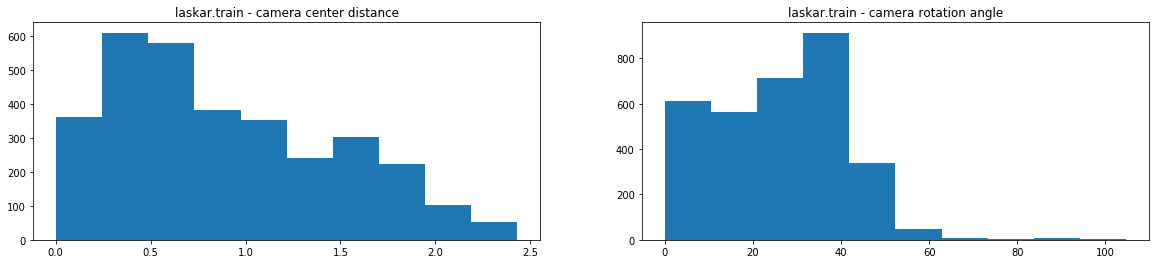

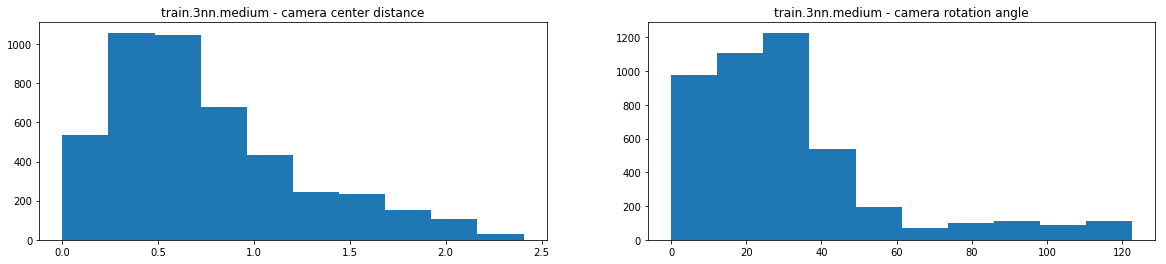

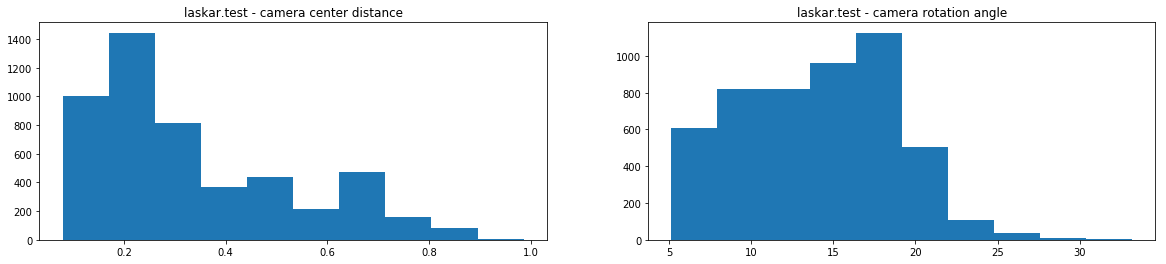

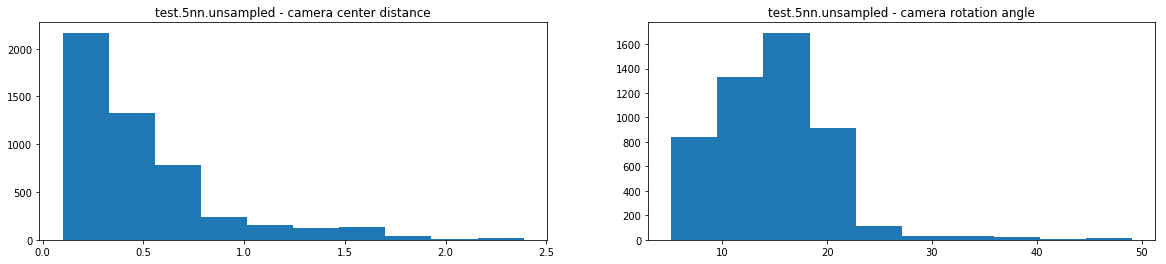

In [6]:
# Specify the dataset to inspect
base_dir = '../data/7Scenes_256/stairs/' 

# Load ground truth labels
abs_pose_set = {}
abs_pose_set.update(load_pose(os.path.join(base_dir, 'dataset_train.txt')))
abs_pose_set.update(load_pose(os.path.join(base_dir, 'dataset_test.txt')))

# Train pairs
cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'train_pairs.ess.new.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='laskar.train')

cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'train_pairs.3nn.medium.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='train.3nn.medium')

# Test pairs
cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'test_pairs.ess.new.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='laskar.test')

cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, 'test_pairs.5nn.unsampled.txt'), abs_pose_set)
plot_distrb(cam_dist, quat_ang, tag='test.5nn.unsampled')
plt.show()   

## Pair check on fly with retrieval result npy

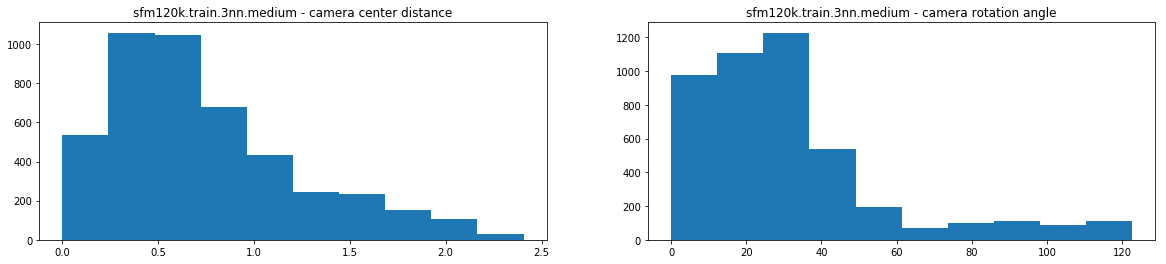

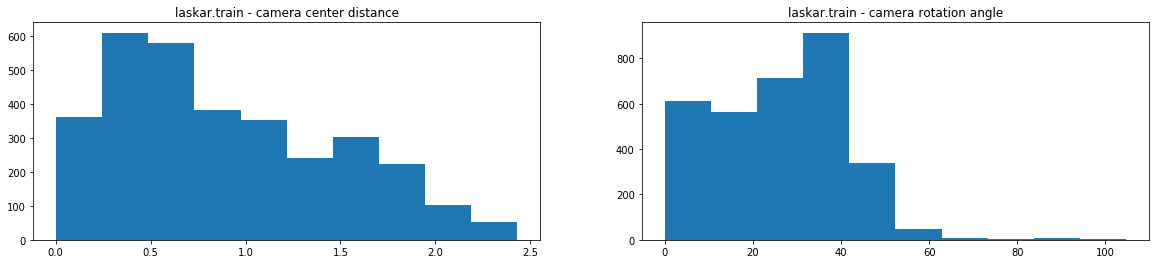

In [22]:
datasets = ['stairs']#, 'chess', 'fire', 'office', 'pumpkin', 'redkitchen']
base_dir = '../data/7Scenes_256'
npy_file = '../../cnnimageretrieval-pytorch/retreival_results/resnet101-gem/sfm120k/7scene-train-val-exp.npy'
K = 3
sc = SampleSchema(case='indoor', mode='medium')

for dataset in datasets:
    rank_data = np.load(npy_file).item()[dataset]  
    train_txt = os.path.join(base_dir, dataset, 'train.exp.txt')
    test_txt = os.path.join(base_dir, dataset, 'val.exp.txt')
    cam_dist, quat_ang = check_pair_distrb_npy(rank_data['train'], K, train_txt, train_txt, sc.sampler)
    plot_distrb(cam_dist, quat_ang, tag='sfm120k.train.{}nn.{}'.format(K, sc.mode))
    
    abs_pose_set = {}
    abs_pose_set.update(load_pose(os.path.join(base_dir, dataset, 'dataset_train.txt')))
    abs_pose_set.update(load_pose(os.path.join(base_dir, dataset, 'dataset_test.txt')))
    
    cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, dataset, 'train_pairs.laskar.txt'), abs_pose_set)
    plot_distrb(cam_dist, quat_ang, tag='laskar.train')    

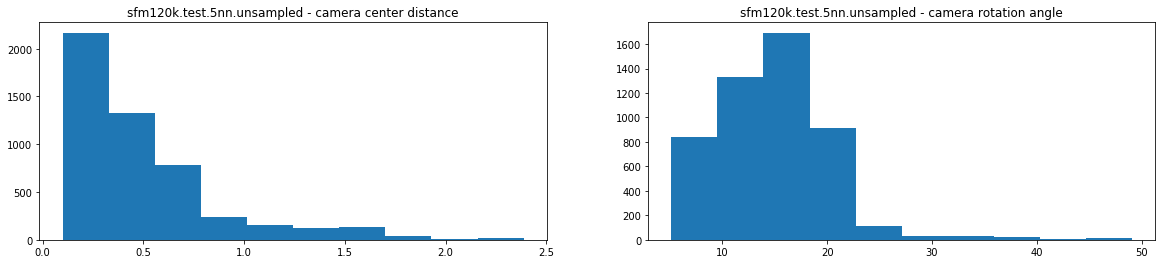

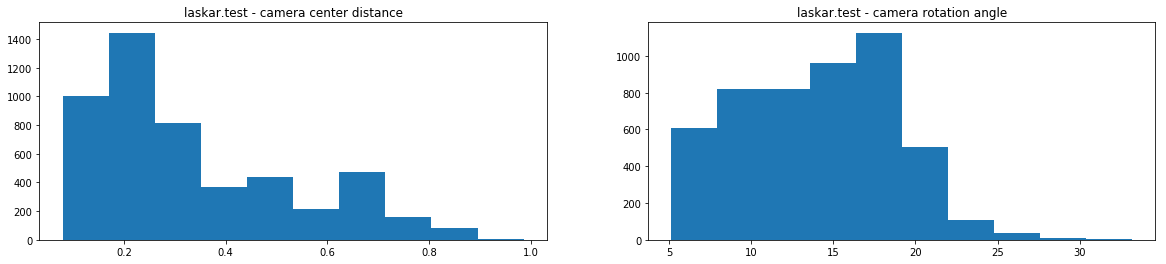

In [20]:
datasets = ['stairs']#, 'chess', 'fire', 'office', 'pumpkin', 'redkitchen']
base_dir = '../data/7Scenes_256'
npy_file = '../../cnnimageretrieval-pytorch/retreival_results/resnet101-gem/sfm120k/7scene-train-test.npy'
K = 5
sc = SampleSchema(case='indoor', mode=None)

for dataset in datasets:
    rank_data = np.load(npy_file).item()[dataset]  
    train_txt = os.path.join(base_dir, dataset, 'dataset_train.txt')
    test_txt = os.path.join(base_dir, dataset, 'dataset_test.txt')
    cam_dist, quat_ang = check_pair_distrb_npy(rank_data['test'], K, train_txt, test_txt, sc.sampler)
    plot_distrb(cam_dist, quat_ang, tag='sfm120k.test.{}nn.{}'.format(K, sc.mode))
    
    abs_pose_set = {}
    abs_pose_set.update(load_pose(os.path.join(base_dir, dataset, 'dataset_train.txt')))
    abs_pose_set.update(load_pose(os.path.join(base_dir, dataset, 'dataset_test.txt')))  
    
    cam_dist, quat_ang = check_pair_distrb_txt(os.path.join(base_dir, dataset, 'test_pairs.laskar.txt'), abs_pose_set)
    plot_distrb(cam_dist, quat_ang, tag='laskar.test') 